Name: Utsa Poddar
UCID: 30071131

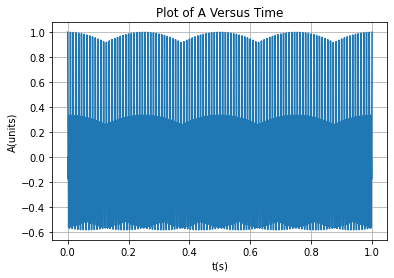

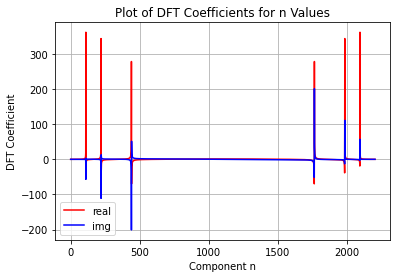

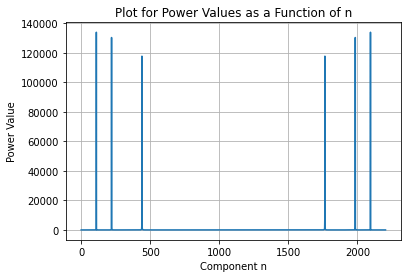

The values of v1, v2 and v3 are 110, 220 and 440, respectively


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

# creating an empty list for the pitch (Amplitude) data from the file
pitchList = []

# creating lists for the time and the signal 
timeList = []

# opening and reading the pitch.txt file, and adding each element to pitchList
file = open("superposition_signal.txt", "r")
content = file.readlines()
#formatting the readlines and adding them to the respective lists
for line in content:
    t,A = line.replace("\n","").split()
    pitchList.append(float(A))
    timeList.append(float(t))

# closing the file after the values are appended to pitchList
file.close()

# initial constants being defined 

N = len(pitchList)
h = 1
tau = N*h 
t = 0

# function that finds the pitch value in pitchList in position "t"
def function(t):
    return pitchList[t]

# this plots the signal as a function of time 
plt.plot(timeList, pitchList)
plt.grid()
#giving the appropriate title, axis labels no units where provided 
plt.title("Plot of A Versus Time")
plt.xlabel('t(s)')
plt.ylabel('A(units)')
plt.show()


# empty lists defined for n values, the Fourier components (real and imaginary), and the power spectrum values

realListFn = []
imListFn = []
nValueList = []
powerValueList = []

# this loop iterates through until the maximum N value is reached
#It finds the Fourier components for the pitch values multiplied by their respective trigonometric functions
for nValue in range(0,N):
    #initializing the real and imaginary components
    real_FnValue = 0 
    im_FnValue = 0 
    for mValue in range(0,N-1):
        #determining the real and imaginary coefficients 
        real_FnValue += function(mValue*h)*cos((2*pi*mValue*nValue)/N)
        im_FnValue += function(mValue*h)*sin((2*pi*mValue*nValue)/N)
    #adding the real and imaginary coefficients to there respective lists 
    realListFn.append(real_FnValue)
    imListFn.append(im_FnValue)
    #adding the components
    nValueList.append(nValue)

# determining the power values by iterating through each list and appending the sum of each list value squared
    powerValue = (realListFn[nValue]**2 + imListFn[nValue]**2)
    #adding the power values to the appropriate list
    powerValueList.append(powerValue)

# the real and imaginary Fourier components are plotted as a function of n 
plt.plot(nValueList,realListFn,'r',label='real')
plt.plot(nValueList,imListFn,'b',label='img')
#giving the appropriate title, axis labels
plt.xlabel("Component n")
plt.ylabel("DFT Coefficient")
plt.title("Plot of DFT Coefficients for n Values")
plt.grid()
plt.legend()
plt.show()

#creating a list to keep the prominent power values
power_v=[]
#determining the prominent power values and adding them to the created list
for i in powerValueList:
  if i>20000:
    power_v.append(i)
#creating a list to keep the determined values of v1,v2 and v3
v_list=[]
#creating a dictionary out of the power and component values
dict_power=dict(zip(powerValueList,nValueList))
#iterating through the dictionary
for i in dict_power:
  for j in power_v:
    #determining the component values of the prominent power values
    if j==i:
      #adding them to the created list
      v_list.append(dict_power[i])


# the power spectrum is plotted as a function of n here:
plt.plot(nValueList,powerValueList)
#giving the appropriate title, axis labels
plt.xlabel("Component n")
plt.ylabel("Power Value")
plt.title("Plot for Power Values as a Function of n")
plt.grid()
plt.show()
print("The values of v1, v2 and v3 are %.0f, %.0f and %.0f, respectively" %(v_list[0],v_list[1],v_list[2]))


The real Fourier contribution dominates as seen from the graph the red peaks(real) are more prominent than blue(imaginary) peaks

Fe 3
the code starts off by introducing two lists, pitchList for the amplitude and timeList for the time. The superposition_signal.txt is opened and the content is formatted and put into there respective lists. The N value is determined using the number of items in the pitchList, h is set to be 1, tau is set to N*h, lastly time is initially 0. Next a function is introduced which finds the pitch value in the pitchList. The previously creating pitchList and timeList are used to plot the signal over time. For the next part lists for the real, imaginary, component value and power value are created, and the formula for the imaginary and real components is used to for each n value, moreover, power from Assignment 4 is used to determine the value if power for each component and all these values are added to their respective lists. The DFT Coefficient are plotted vs n. For the next part, a list was created to keep the prominent power values and using a for loop the prominent power values was determined and added to the created list. Then a list was created to keep the determined values of v1, v2 and v3, a dictionary was created out of the power and component values, and through a nested for loop and if statement the prominent values of the power were determined. Lastly the power vs n graph was plotted.
